In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

data = pd.read_csv('../data/day1/iris.csv')
data.head(5)

,feat1,feat2,feat3,feat4,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
class Normalizer:

    def __init__(self):
        self.sc = StandardScaler()
    
    def scale(self, X, dtype):
        if dtype=='train':
            XX = self.sc.fit_transform(X)
        elif dtype=='test':
            XX = self.sc.transform(X)
        else:
            return None
        return XX
    
data_ = data.iloc[:, :-1].values

norm = Normalizer()
data_ = norm.scale(data_, 'train')

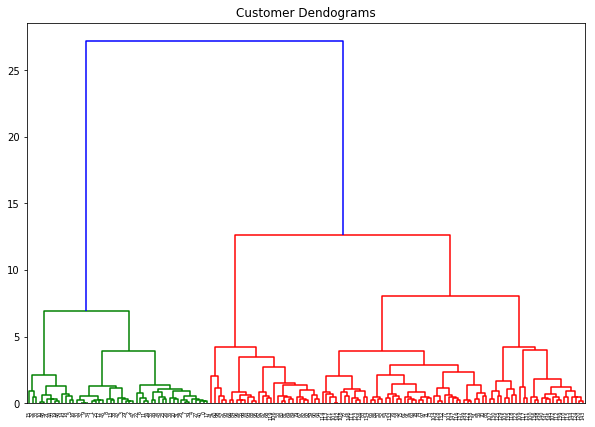

In [24]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(data_, method='ward')) 

In [ ]:
## in the above diagram, if we draw a horizontal line cutting the longest line with no already horontal line
## (i.e left blue) in this case. If we make a horizontal line cutting it we will witness 3 cuts overall which means 
## 3 clusters

In [26]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_) 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Reference

1. https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
2. http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html